In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/사업기획.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 ...,데이터 기반 솔루션 전략 수립 및 기획 5년 이상 경력이 있는 분 서비스 기획 또...
1,성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application...,3년 이상의 경력자 0to1을 해보셨거나 하고자 하는 강한 의지가 있으신 분 가설...
2,전기차 충전 사업 개발 및 관리충전 및 에너지 신사업 기획제안 B2B 프로젝트 관리,경력 경력무관신입가능3개월 시용기간직급 매니저전기차 충전 사업 개발 및 관리충전 ...
3,전기차 충전 사업 사업개발Project Management 조직 리드 전국 단위 ...,전기 시설 관련 시공 프로젝트 관리 경험 5년 이상 보유하신 분 시공 파트너사 협...
4,사업관리기술기획IT 개발 역량,학력 대졸이상경력 경력10년이상석사학위 수여자박사학위 수여자관련학과 전공자관련 ...
...,...,...
142,쿡앱스에서 앞으로 담당하실 업무예요 쿡앱스 사업지원팀에서 팀배틀 RPG 장르의 프...,이에요 사업 PM 업무 5년 이상이신 분 사업 전략에 따라 주요 KPI를 설정하고 ...
143,사업기획 사업전략 및 사업계획 수립 대외협력국내외 관련업체 IR 홍보...,전장업체 경력자 전자컴퓨터정보통신 관련 전공자 시장과 기술에 대한 이해도가 높은 ...
144,치과시장 동향 분석 서비스 전략 수립 및 신규 사업 발굴 플랫폼 사업 운영 및 서...,영어 회화 능통 대학교 졸업 이상 관련 경력 3년 이상 치과 또는 의료 산업의 이...
145,다큐브의 제휴 담당자는 B2B 솔루션에 대한 높은 이해도를 바탕으로 국내 기업용 솔...,제휴사업 경력 5년10년 또는 그에 준하는 역량을 보유하신 분 제휴 업무에 대한 ...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 ...
1,성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application...
2,전기차 충전 사업 개발 및 관리충전 및 에너지 신사업 기획제안 B2B 프로젝트 관리
3,전기차 충전 사업 사업개발Project Management 조직 리드 전국 단위 ...
4,사업관리기술기획IT 개발 역량
...,...
142,쿡앱스에서 앞으로 담당하실 업무예요 쿡앱스 사업지원팀에서 팀배틀 RPG 장르의 프...
143,사업기획 사업전략 및 사업계획 수립 대외협력국내외 관련업체 IR 홍보...
144,치과시장 동향 분석 서비스 전략 수립 및 신규 사업 발굴 플랫폼 사업 운영 및 서...
145,다큐브의 제휴 담당자는 B2B 솔루션에 대한 높은 이해도를 바탕으로 국내 기업용 솔...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/사업기획(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 디지털광고 상품DSP 등 전략 수립 및 기획 고객행동 데이터 분석 및 분석서비스 개발 자사 솔루션과 서비스의 Value를 고객에게 전파\n성장 포인트에 대해 알려드려요하나 기획자로서 거래소라는 복잡한 Application을 가장 빠르게 변하는 산업에서 대응하는 스킬을 향상시켜 추후 어떤 프로덕트를 기획하더라도 느리게 움직이는 효과를 체감할 수 있습니다둘 거래소는 글로벌 금융경제와 밀접하게 관련 있는 서비스이기 때문에 금융지식이 포괄적으로 상승합니다셋 Web3 생태계에서 기획자의 경험을 쌓을 수 있습니다 Web3가 미개척 산업인만큼 국내 Web3 기획자가 희귀하고 실력있는 Web3 기획자는 세계적으로도 희귀합니다넷 빈번하게 Web3 event를 스폰하고 있고 적극적으로 네트워킹하고 있습니다 정기적으로 열리는 KBW Upbit conference와 같은 Web3 행사 참여를 적극 권하고 있기 때문에 자신만의 네트워크 형성하기 좋은 환경입니다다섯 Web3 산업 특성상 고객파트너VC 모두 해외사입니다 자유롭게 해외사와 교류 할 수 있고 추후 해외 회사에서 일하고 싶다면 VC와 연결하여 Web3 해외사를 경험해 볼 수 있습니다 추후 두바이 진출도 염두해두고 있어 선택적으로 국내잔류 혹은 해외진출을 선택할 수 있습니다여섯 Web3는 타산업보다 빠르게 프로덕트 0to1을 만들 수 있습니다 스타트업 프로덕트의 모든 과정을 컴팩트하게 경험하면서 어느 단계에서 어떤 문제들이 생기고 어떻게 해결하고 어떻게 협업하는지 전체적으로 경험할 수 있습니다이런 일을 해요 개발 디자인 사업 마케팅 팀들을 매니징하며 크립토 거래소DEX Web3 기반 서비스를 기획운영합니다 가설검증 사이클들을 운영하며 핵심 피쳐들을 정의합니다 일단위 유저인터뷰를 통해 유저의 페르소나와 니즈를 세밀화하고 팀과 공유합니다 Web3 UIUX를 혁신할 새로운 기술을 리서치하고 적용합니다 ex Walletless DeFi LP Asset Flexibility etc DeFi의 장점을 살려 투명한 리스크관

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '디지털',
 '광고',
 '상품',
 '등',
 '전략',
 '수립',
 '및',
 '기획',
 '고객',
 '행동',
 '데이터',
 '분석',
 '및',
 '분석',
 '서비스',
 '개발',
 '자사',
 '솔루션',
 '서비스',
 '를',
 '고객',
 '전파',
 '성장',
 '포인트',
 '대해',
 '하나',
 '기획',
 '로서',
 '거래소',
 '가장',
 '산업',
 '대응',
 '스킬',
 '향상',
 '추후',
 '프로덕트',
 '기획',
 '효과',
 '체감',
 '수',
 '둘',
 '거래소',
 '글로벌',
 '금융',
 '경제',
 '관련',
 '서비스',
 '이기',
 '때문',
 '금융',
 '지식',
 '포괄',
 '상승',
 '셋',
 '생태계',
 '기획',
 '자의',
 '경험',
 '수',
 '미개척',
 '산업',
 '국내',
 '기획',
 '희귀',
 '실력',
 '기획',
 '세계',
 '희귀',
 '넷',
 '빈번',
 '를',
 '스폰',
 '적극',
 '네트워킹',
 '정기',
 '행사',
 '참여',
 '적극',
 '때문',
 '자신',
 '네트워크',
 '형성',
 '환경',
 '산업',
 '특성',
 '고객',
 '파트너',
 '모두',
 '해외',
 '사',
 '해외',
 '교류',
 '수',
 '추후',
 '해외',
 '회사',
 '일',
 '해외',
 '경험',
 '볼',
 '수',
 '추후',
 '두바이',
 '진출',
 '염두',
 '선택',
 '국내',
 '잔류',
 '해외진출',
 '선택',
 '수',
 '여섯',
 '산업',
 '프로',
 '덕트',
 '수',
 '스타트업',
 '프로덕트',
 '모든',
 '과정',
 '컴팩트',
 '경험',
 '단계',
 '문제',
 '생기',
 '해결',
 '협업',
 '전체',
 '경험',
 '수',
 '일',
 '해',
 '개발',
 '디자인',
 '사업',
 '마케팅',
 '팀',
 '매니',
 '징',
 '크립',

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

7250
900


FreqDist({'및': 441, '사업': 286, '관리': 197, '기획': 162, '수립': 142, '운영': 130, '분석': 127, '전략': 97, '업무': 93, '등': 93, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '서비스','사','실행','수립','사요','작성','문제','우수','능력','관련','이상','기반','비즈니스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '디지털',
 '광고',
 '상품',
 '전략',
 '기획',
 '고객',
 '행동',
 '데이터',
 '분석',
 '분석',
 '개발',
 '솔루션',
 '를',
 '고객',
 '전파',
 '성장',
 '포인트',
 '대해',
 '하나',
 '기획',
 '로서',
 '거래소',
 '가장',
 '산업',
 '대응',
 '스킬',
 '향상',
 '추후',
 '프로덕트',
 '기획',
 '효과',
 '체감',
 '둘',
 '거래소',
 '글로벌',
 '금융',
 '경제',
 '이기',
 '때문',
 '금융',
 '지식',
 '포괄',
 '상승',
 '셋',
 '생태계',
 '기획',
 '자의',
 '미개척',
 '산업',
 '국내',
 '기획',
 '희귀',
 '실력',
 '기획',
 '세계',
 '희귀',
 '넷',
 '빈번',
 '를',
 '스폰',
 '적극',
 '네트워킹',
 '정기',
 '행사',
 '참여',
 '적극',
 '때문',
 '자신',
 '네트워크',
 '형성',
 '환경',
 '산업',
 '특성',
 '고객',
 '파트너',
 '모두',
 '해외',
 '해외',
 '교류',
 '추후',
 '해외',
 '회사',
 '해외',
 '볼',
 '추후',
 '두바이',
 '진출',
 '염두',
 '선택',
 '국내',
 '잔류',
 '해외진출',
 '선택',
 '여섯',
 '산업',
 '프로',
 '덕트',
 '프로덕트',
 '모든',
 '과정',
 '컴팩트',
 '단계',
 '생기',
 '협업',
 '전체',
 '해',
 '개발',
 '디자인',
 '마케팅',
 '매니',
 '징',
 '크립',
 '토',
 '거래소',
 '기획',
 '운영',
 '가설검증',
 '사이클',
 '운영',
 '핵심',
 '정의',
 '단위',
 '유저',
 '인터뷰',
 '통해',
 '유저',
 '페르소나',
 '를',
 '세밀화',
 '공유',
 '를',
 '혁신',
 '기술',
 '리서치',
 '적용',
 '의',
 '장점',
 '리스크',
 '관리'

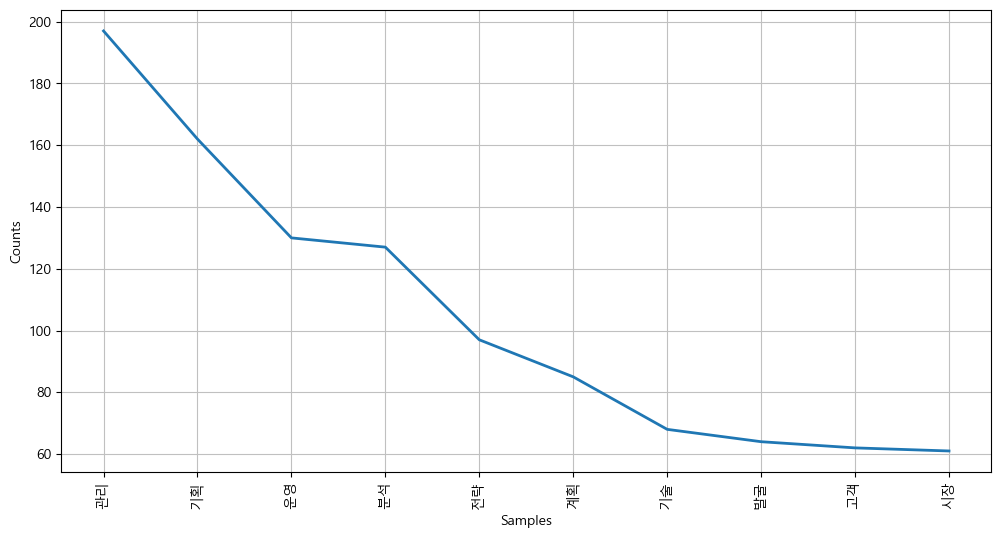

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

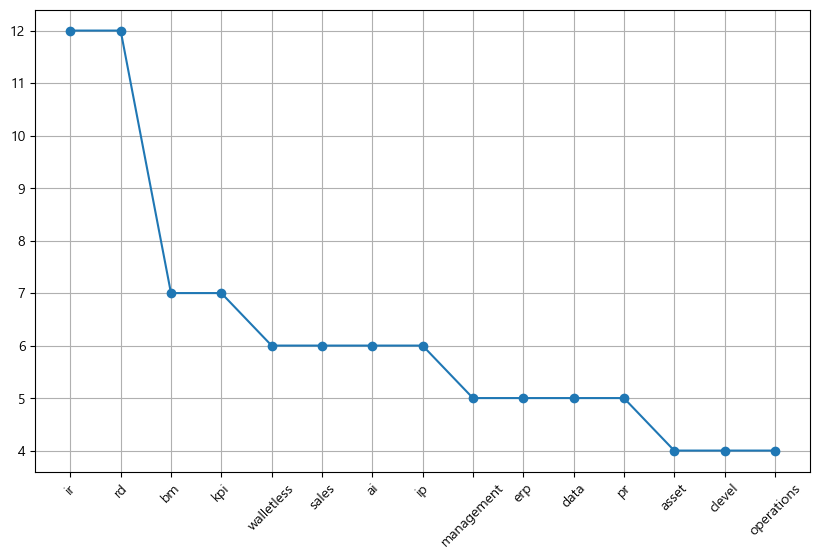

In [13]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)